In [1]:
# read pandas csv
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns #visualization package
import sqlalchemy


In [4]:
url = "mysql+mysqldb://root:@localhost/weather_iot"
engine = sqlalchemy.create_engine(url)

In [15]:
df = pd.read_csv("./weather.csv")
pd.read

In [16]:
df.head()

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,2009-01-01
1,Bac Lieu,31,25,20,ENE,0.0,64,24,1010,2010-01-01
2,Bac Lieu,29,24,14,E,0.0,75,45,1008,2011-01-01
3,Bac Lieu,30,24,30,E,0.0,79,52,1012,2012-01-01
4,Bac Lieu,31,25,20,ENE,0.0,70,24,1010,2013-01-01


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181960 entries, 0 to 181959
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   province  181960 non-null  object 
 1   max       181960 non-null  int64  
 2   min       181960 non-null  int64  
 3   wind      181960 non-null  int64  
 4   wind_d    181960 non-null  object 
 5   rain      181960 non-null  float64
 6   humidi    181960 non-null  int64  
 7   cloud     181960 non-null  int64  
 8   pressure  181960 non-null  int64  
 9   date      181960 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 13.9+ MB


In [18]:
# filter

df_ha_noi = df[df['province'].isin(['Ha Noi'])] 

In [19]:
df_ha_noi.head()

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
136410,Ha Noi,19,12,6,NNE,0.0,70,44,1025,2009-01-01
136411,Ha Noi,18,17,5,NNE,4.4,92,100,1015,2010-01-01
136412,Ha Noi,20,15,5,E,0.8,85,66,1015,2011-01-01
136413,Ha Noi,20,16,5,ESE,0.0,66,76,1021,2012-01-01
136414,Ha Noi,20,11,4,SE,0.0,43,29,1019,2013-01-01


In [20]:
df.corr()

,max,min,wind,rain,humidi,cloud,pressure
max,1.000000,0.780044,-0.045712,-0.072070,-0.357601,-0.550910,-0.665067
min,0.780044,1.000000,0.184860,0.091397,-0.063603,-0.301693,-0.724969
wind,-0.045712,0.184860,1.000000,0.015043,-0.090157,-0.008016,0.023507
rain,-0.072070,0.091397,0.015043,1.000000,0.360097,0.299645,-0.210100
humidi,-0.357601,-0.063603,-0.090157,0.360097,1.000000,0.546218,-0.153943
cloud,-0.550910,-0.301693,-0.008016,0.299645,0.546218,1.000000,0.175691
pressure,-0.665067,-0.724969,0.023507,-0.210100,-0.153943,0.175691,1.000000


In [12]:
# df to mysql
df.corr().to_sql(name='weather_corr', con=engine, if_exists = 'replace', index=False)

7

In [21]:
# draw weather
df_ha_noi_weather = df_ha_noi[['min',"max", 'date']]
# avg temp
df_ha_noi_weather['avg'] = (df_ha_noi_weather['min'] + df_ha_noi_weather['max'])/2


# sort data by date
df_ha_noi_weather = df_ha_noi_weather.sort_values(by=['date'])

df_ha_noi_weather.head()

C:\Users\nguyen\AppData\Local\Temp\ipykernel_18272\293808935.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ha_noi_weather['avg'] = (df_ha_noi_weather['min'] + df_ha_noi_weather['max'])/2


,min,max,date,avg
136410,12,19,2009-01-01,15.5
136423,12,18,2009-01-02,15.0
136472,13,20,2009-01-03,16.5
136509,12,25,2009-01-04,18.5
136535,14,23,2009-01-05,18.5


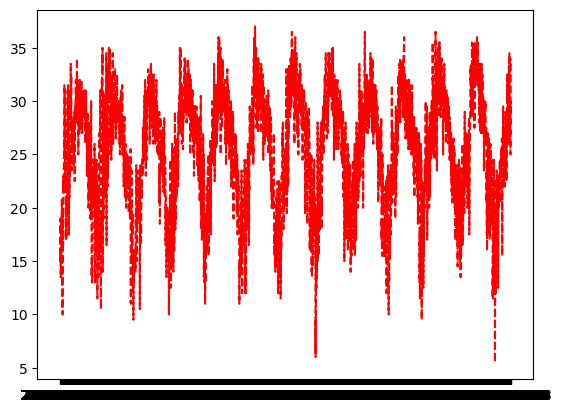

In [28]:
# draw plt
import matplotlib.pyplot as plt
import numpy as np

# plt.plot(df_ha_noi_weather['date'], df_ha_noi_weather['min'], 'r--', df_ha_noi_weather['date'], df_ha_noi_weather['max'], 'bs')
# plt.show()


plt.plot(df_ha_noi_weather['date'], df_ha_noi_weather['avg'], 'r--')
plt.show()
